In [58]:
from tabu import *
from utils import *
from rvns import *
import matplotlib.pyplot as plt

In [59]:
p = theo_processing_times()
d = theo_due_dates()
num_jobs = len(p)
w = [1 for _ in range(num_jobs)]
G = workflow()
initial_schedule = [30, 29, 23, 10, 9, 14, 13, 12, 4, 20, 22, 3, 27, 28, 8, 7, 19, 21, 26, 18, 25, 17, 15, 6, 24, 16, 5, 11, 2, 1, 31]

In [60]:
# 2.1 - Tabu Search
K_tabu = 120000
tabu = Tabu(L=20, gamma=10)
best_schedule, best_cost = tabu.tabu_search(initial_schedule, p, d, w, K_tabu, G, 1)
print('K: ', K_tabu)
print('Best schedule: ', best_schedule)
print('Best cost: ', best_cost)

k: 0, current_cost: 341.0, best_cost: 341.0
k: 1, current_cost: 341.0, best_cost: 341.0
k: 2, current_cost: 341.0, best_cost: 341.0
k: 3, current_cost: 341.0, best_cost: 341.0
k: 4, current_cost: 341.0, best_cost: 341.0
k: 5, current_cost: 341.0, best_cost: 341.0
k: 6, current_cost: 341.0, best_cost: 341.0
k: 7, current_cost: 341.0, best_cost: 341.0
k: 8, current_cost: 341.0, best_cost: 341.0
k: 9, current_cost: 341.0, best_cost: 341.0
k: 10, current_cost: 335.0, best_cost: 335.0
k: 11, current_cost: 335.0, best_cost: 335.0
k: 12, current_cost: 335.0, best_cost: 335.0
k: 13, current_cost: 335.0, best_cost: 335.0
k: 14, current_cost: 335.0, best_cost: 335.0
k: 15, current_cost: 333.0, best_cost: 333.0
k: 16, current_cost: 323.0, best_cost: 323.0
k: 17, current_cost: 323.0, best_cost: 323.0
k: 18, current_cost: 323.0, best_cost: 323.0
k: 19, current_cost: 305.0, best_cost: 305.0
k: 20, current_cost: 300.0, best_cost: 300.0
k: 21, current_cost: 305.0, best_cost: 300.0
k: 22, current_cost:

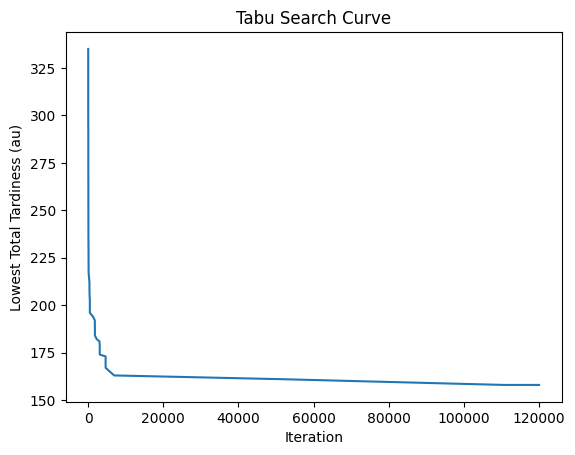

In [61]:
# Plotting
tabu_xs = [k for (_, _, k) in tabu.check_points]
tabu_ys = [cost for (_, cost, _) in tabu.check_points]
plt.plot(tabu_xs, tabu_ys)
plt.xlabel('Iteration')
plt.ylabel('Lowest Total Tardiness (au)')
plt.title('Tabu Search Curve')
plt.show()

In [62]:
# 2.2 TODO 

In [63]:
# 3.2 - RVNS
K_rvns = 2000
rvns = RVNS(neighborhood_by_swap, num_jobs-1, seed=3)
best_schedule, best_cost = rvns.rvns_search(initial_schedule, p, d, w, K_rvns, G, 1)
print('K: ', K_rvns)
print('Best schedule: ', best_schedule)
print('Best cost: ', best_cost)


k: 0, current_cost: 341.0
k: 1, current_cost: 335.0
k: 2, current_cost: 327.0
k: 3, current_cost: 325.0
k: 4, current_cost: 315.0
k: 5, current_cost: 309.0
k: 6, current_cost: 298.0
k: 7, current_cost: 296.0
k: 8, current_cost: 293.0
k: 9, current_cost: 288.0
k: 10, current_cost: 264.0
k: 11, current_cost: 256.0
k: 12, current_cost: 252.0
k: 13, current_cost: 251.0
k: 14, current_cost: 241.0
k: 15, current_cost: 238.0
k: 16, current_cost: 236.0
k: 17, current_cost: 218.0
k: 18, current_cost: 208.0
k: 19, current_cost: 200.0
k: 20, current_cost: 200.0
k: 21, current_cost: 195.0
k: 22, current_cost: 190.0
k: 23, current_cost: 190.0
k: 24, current_cost: 190.0
k: 25, current_cost: 190.0
k: 26, current_cost: 190.0
k: 27, current_cost: 190.0
k: 28, current_cost: 190.0
k: 29, current_cost: 190.0
k: 30, current_cost: 190.0
k: 31, current_cost: 190.0
k: 32, current_cost: 190.0
k: 33, current_cost: 190.0
k: 34, current_cost: 190.0
k: 35, current_cost: 190.0
k: 36, current_cost: 190.0
k: 37, curr

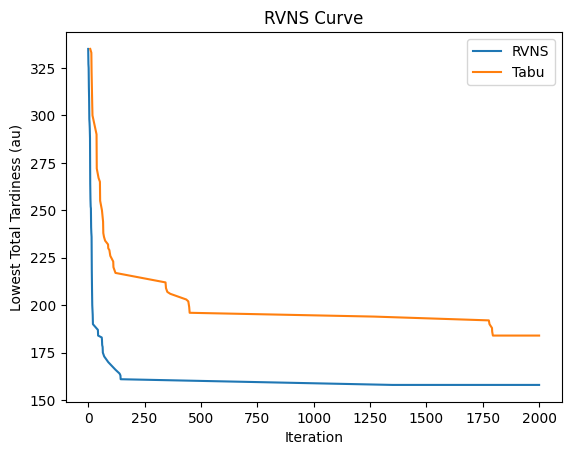

In [64]:
# Plotting
rvns_xs = [k for (_, _, k, _) in rvns.check_points]
rvns_ys = [cost for (_, cost, _, _) in rvns.check_points]
tabu_xs2 = [k for k in tabu_xs if k <= K_rvns]
tabu_ys2 = tabu_ys[:len(tabu_xs2)]
tabu_xs2.append(K_rvns)
tabu_ys2.append(tabu_ys2[-1])
plt.plot(rvns_xs, rvns_ys)
plt.plot(tabu_xs2, tabu_ys2)
plt.xlabel('Iteration')
plt.ylabel('Lowest Total Tardiness (au)')
plt.legend(['RVNS', 'Tabu'])
plt.title('RVNS Curve')
plt.show()

In [65]:
# 3.3 RVNS optimization 
K_rvns_opt = 500
best_schedule, best_cost = rvns.rvns_search(initial_schedule, p, d, w, K_rvns_opt, G, 1, optimization=True)
print('K: ', K_rvns_opt)
print('Best schedule: ', best_schedule)
print('Best cost: ', best_cost)

k: 0, current_cost: 341.0
k: 1, current_cost: 323.0
k: 2, current_cost: 312.0
k: 3, current_cost: 301.0
k: 4, current_cost: 278.0
k: 5, current_cost: 263.0
k: 6, current_cost: 257.0
k: 7, current_cost: 253.0
k: 8, current_cost: 251.0
k: 9, current_cost: 246.0
k: 10, current_cost: 230.0
k: 11, current_cost: 228.0
k: 12, current_cost: 226.0
k: 13, current_cost: 221.0
k: 14, current_cost: 218.0
k: 15, current_cost: 216.0
k: 16, current_cost: 212.0
k: 17, current_cost: 206.0
k: 18, current_cost: 202.0
k: 19, current_cost: 172.0
k: 20, current_cost: 164.0
k: 21, current_cost: 164.0
k: 22, current_cost: 164.0
k: 23, current_cost: 164.0
k: 24, current_cost: 164.0
k: 25, current_cost: 164.0
k: 26, current_cost: 164.0
k: 27, current_cost: 164.0
k: 28, current_cost: 164.0
k: 29, current_cost: 164.0
k: 30, current_cost: 164.0
k: 31, current_cost: 164.0
k: 32, current_cost: 164.0
k: 33, current_cost: 164.0
k: 34, current_cost: 164.0
k: 35, current_cost: 164.0
k: 36, current_cost: 164.0
k: 37, curr

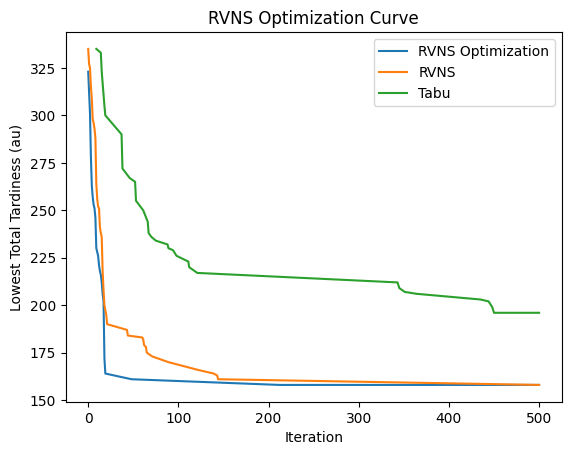

In [66]:
# Plotting
rvns_xs_opt = [k for (_, _, k, _) in rvns.check_points]
rvns_ys_opt = [cost for (_, cost, _, _) in rvns.check_points]
rvns_xs2 = [k for k in rvns_xs if k <= K_rvns_opt]
rvns_ys2 = rvns_ys[:len(rvns_xs2)]
rvns_xs2.append(K_rvns_opt)
rvns_ys2.append(rvns_ys[-1])
tabu_xs3 = [k for k in tabu_xs if k <= K_rvns_opt]
tabu_ys3 = tabu_ys[:len(tabu_xs3)]
tabu_xs3.append(K_rvns_opt)
tabu_ys3.append(tabu_ys3[-1])
plt.plot(rvns_xs_opt, rvns_ys_opt)
plt.plot(rvns_xs2, rvns_ys2)
plt.plot(tabu_xs3, tabu_ys3)
plt.xlabel('Iteration')
plt.ylabel('Lowest Total Tardiness (au)')
plt.legend(['RVNS Optimization', 'RVNS', 'Tabu'])
plt.title('RVNS Optimization Curve')
plt.show()